In [64]:
import pickle
import numpy as np
import cv2
import glob

import namespace
import converter
import predictor
import metric_map
import dataset_generator
import log_parser

reload(namespace)
reload(converter)
reload(predictor)
reload(metric_map)
reload(dataset_generator)
reload(log_parser)

from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [65]:
Converter = converter.Converter()
mAP = metric_map.mAP()
Pred = predictor.Predictor()
DSGen = dataset_generator.DatasetCreator(anno_dict, vid_dirtoken_dict)
Parser = log_parser.LogParser()

Loading weights into state dict...
Finished!


In [66]:
#first extract raw annotation from file.
#the raw annotation is just a list of [filename: annotation_for_that_file]
if 'raw_anno' not in locals():
    raw_anno = pickle.load(open(namespace.FILEPATH_IMAGENET_ANNOTATION))


In [67]:
#first functionality, convert raw ground truth annotation
anno, anno_dict = Converter.convert_annotation(raw_anno)

In [68]:
#we only have vidname as clue now, since the vid goes through lots of processing.
#therefore, load the vid_dirtoken_dict and retrieve the dirtoken
vid_dirtoken_dict = pickle.load(open(namespace.FILEPATH_VID_DIRTOKEN_DICT))

In [69]:
vidname = 'ILSVRC2015_train_00025028'
dirtoken = vid_dirtoken_dict[vidname]
print Converter.get_ftoken_from_vidname_and_idx(vid_dirtoken_dict, vidname, 0)
print dirtoken
print Converter.get_ftoken_from_vidname_and_idx(vid_dirtoken_dict, vidname, 0)

ILSVRC2015_VID_train_0000_ILSVRC2015_train_00025028_000000
ILSVRC2015_VID_train_0000_ILSVRC2015_train_00025028
ILSVRC2015_VID_train_0000_ILSVRC2015_train_00025028_000000


0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b2048/i00001.jpg


<Figure size 432x288 with 0 Axes>

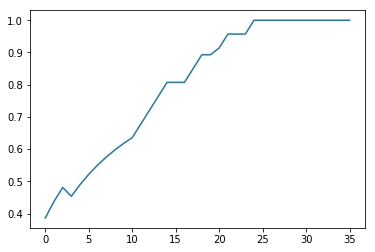

<Figure size 432x288 with 0 Axes>

In [72]:
videoname = 'ILSVRC2015_train_00025028'
pattern_list = ['/x720_b2048/*', '/x720_b1024/*', '/x720_b512/*', '/x720_b256/*', '/x720_b128/*', '/x720_b64/*', '/x720_b32/*',\
               '/x480_b1024/*', '/x480_b512/*', '/x480_b256/*', '/x480_b128/*', '/x480_b64/*', '/x480_b32/*',\
               '/x360_b512/*', '/x360_b256/*', '/x360_b128/*', '/x360_b64/*', '/x360_b32/*',\
               '/x240_b256/*', '/x240_b128/*', '/x240_b64/*', '/x240_b32/*',\
               '/x144_b128/*', '/x144_b64/*', '/x144_b32/*']
y_list = []
for pattern in pattern_list:
    y1 = DSGen.create_mAP_line(namespace.DIRPATH_VID_FRAMES + videoname + pattern, videoname, mAP, Converter, Pred, to_file=False)
    y_list.append(y1)

0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b2048/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b1024/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b512/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b256/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b128/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b64/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x720_b32/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x480_b1024/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x480_b512/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x480_b256/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x480_b128/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x480_b64/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x480_b32/i00001.jpg
0 ./data/VID_data/scaled/ILSVRC2015_train_00025028/x360_b512/i000

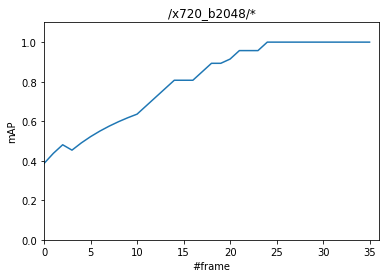

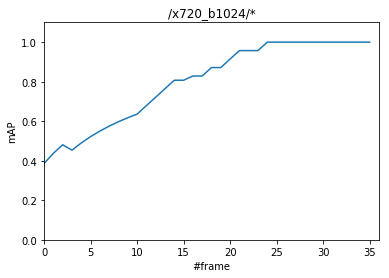

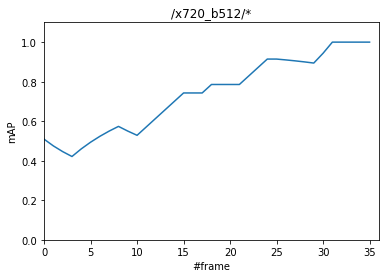

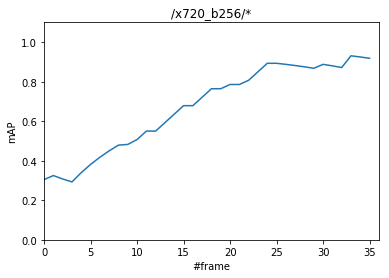

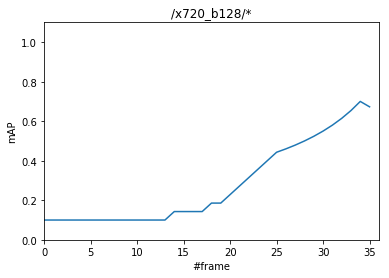

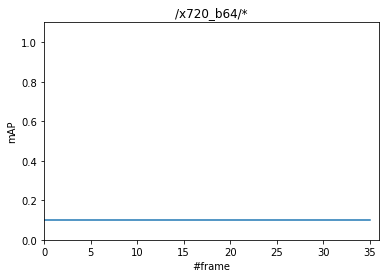

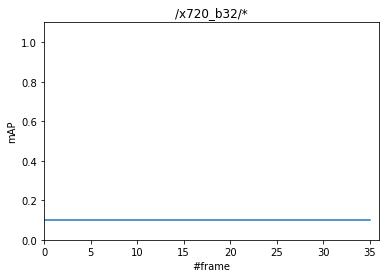

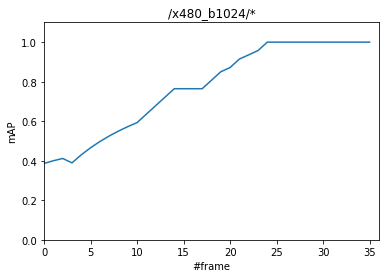

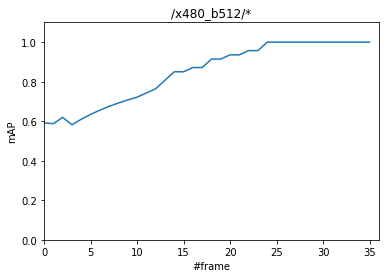

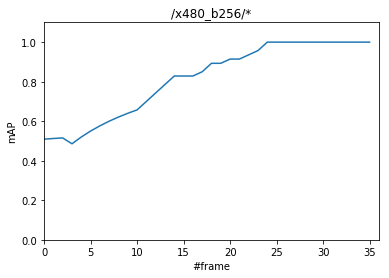

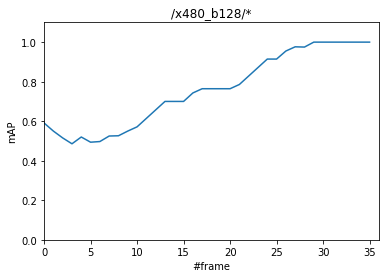

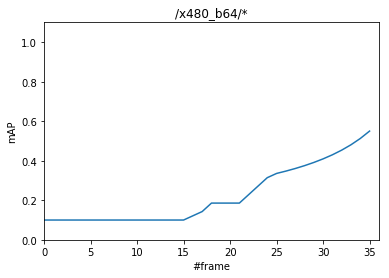

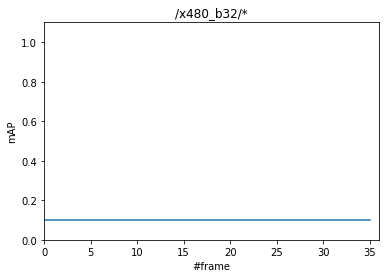

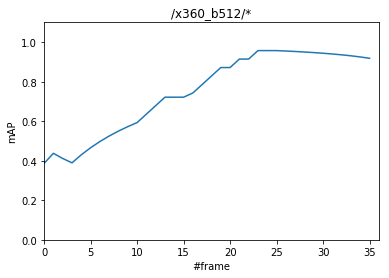

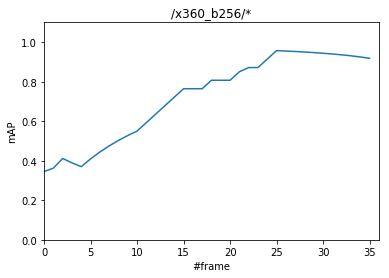

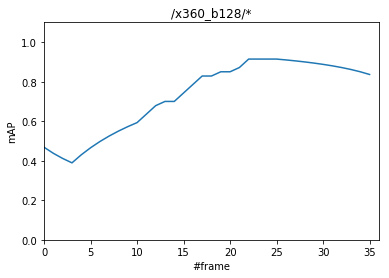

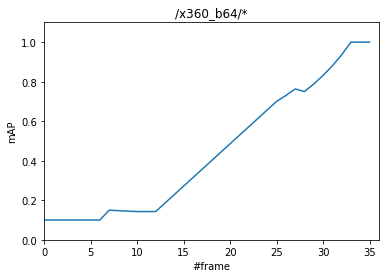

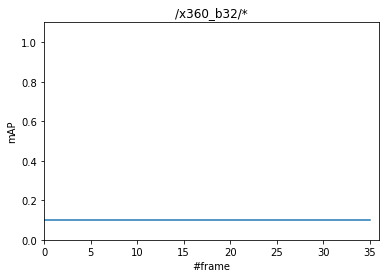

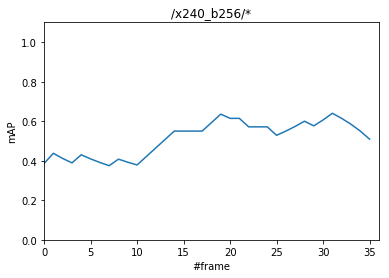

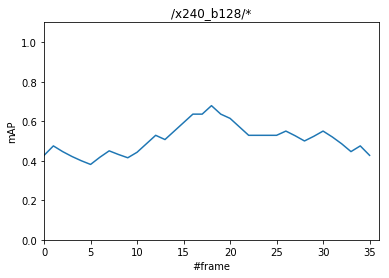

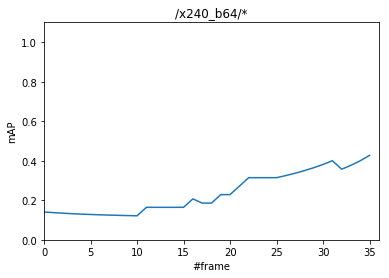

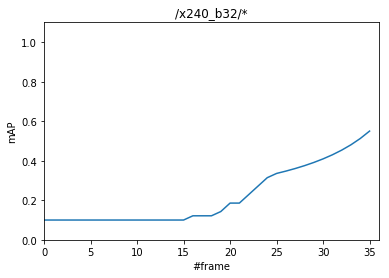

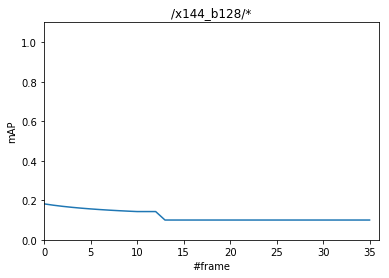

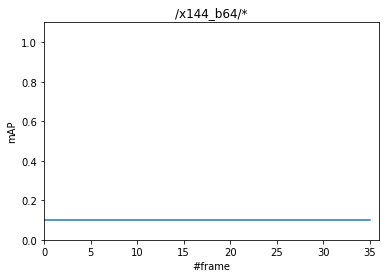

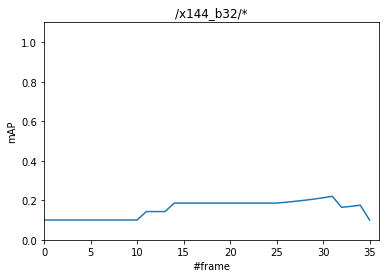

<Figure size 432x288 with 0 Axes>

In [73]:
for idx, y in enumerate(y_list):
    plt.plot(y)
    plt.axis([0, len(y), 0, 1.1])
    plt.xlabel('#frame')
    plt.ylabel('mAP')
    plt.title(pattern_list[idx])
    videoname = 'ILSVRC2015_train_00025028'
    plt.figure()

In [ ]:
#now, debug performance buy select some image along the graph
img_path = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00021000/000200.JPEG'
plt.imshow(cv2.imread(img_path, cv2.IMREAD_COLOR))
plt.axis('off')
plt.figure()
img_path = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00021000/001100.JPEG'
plt.imshow(cv2.imread(img_path, cv2.IMREAD_COLOR))
plt.axis('off')
plt.figure()
img_path = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00021000/002100.JPEG'
plt.imshow(cv2.imread(img_path, cv2.IMREAD_COLOR))
plt.axis('off')
plt.figure()

In [ ]:
import timeit
time_list = []
#image_filepath = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00003000/000461.JPEG'
#image_filepath = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00016000/000008.JPEG'
image_filepath = './data/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00021000/000100.JPEG'

ftoken = converter.Converter.get_token_from_filepath(image_filepath)
dtoken = converter.Converter.get_dirtoken_from_filetoken(ftoken)

time_list.append(timeit.default_timer())
image = cv2.imread(image_filepath, cv2.IMREAD_COLOR)
time_list.append(timeit.default_timer())
pred = Pred.detect(image)
time_list.append(timeit.default_timer())
pred_item = Converter.convert_prediction_item(pred)
time_list.append(timeit.default_timer())
score =  mAP.score(pred_item, anno_dict[dtoken][ftoken])
time_list.append(timeit.default_timer())


print 'score: ', score
time_list = np.array(time_list)
print zip(('read file', 'prediction', 'convert predict', 'calc mAP'), time_list[1:] - time_list[:-1])

plt.imshow(image)
print image.shape

In [ ]:
x = np.arange(100)
print len(x)
x1 = moving_average(x)
print len(x1)

In [ ]:
y = range(10)
print y, y[-5:5], y[5:-5], y[5:len(y)], y[5:1]

In [ ]:
pos = 0
y, slice_array(y, pos-2, pos+2)
y1 = moving_average(y, step=2)
print y, y1

In [ ]:
np.mean(slice_array(y, 0-2, 0+2))

In [7]:
tmp = Parser.parse_video_metainfo(namespace.FILEPATH_LOG_VIDEOMETAINFO)
info_list,_,_,_,_ = Parser.parse_video_metainfo('./data/VID_data/log_scaledvid_metainfo.txt')


In [8]:
print 'total number of videos: {}'.format(len(info_list))
r144_list, r240_list, r360_list, r480_list = [], [], [], []
rdict = {144:r144_list, 240:r240_list, 360:r360_list, 480:r480_list}
for filename, w, h, br in info_list:
    if w==480 and br < 1.0:
        continue
    if w==144 and br < 0.1:
        continue
    if w==240 and br < 
    rdict[w].append(br)

total number of videos: 232


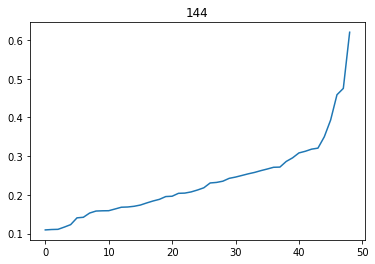

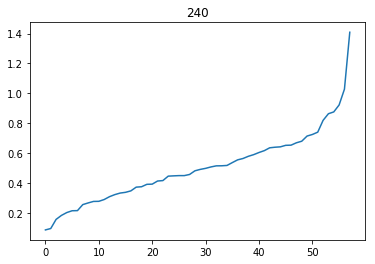

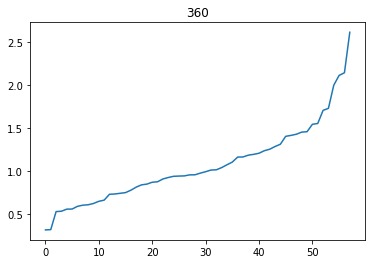

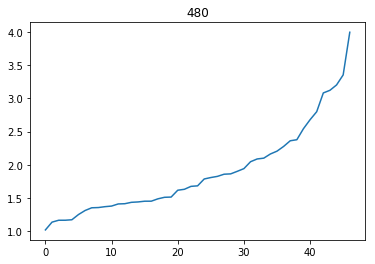

<Figure size 432x288 with 0 Axes>

In [10]:
for item in [144, 240, 360, 480]:
    plt.plot(sorted(rdict[item]))
    plt.title(item)
    plt.figure()

In [17]:
filename_list= glob.glob("./data/VID_data/scaled/*")
print filename_list

['./data/VID_data/scaled/ILSVRC2015_train_00007001_x144.mp4', './data/VID_data/scaled/ILSVRC2015_train_00007001_x240.mp4', './data/VID_data/scaled/ILSVRC2015_train_00007001_x360.mp4', './data/VID_data/scaled/ILSVRC2015_train_00007001_x480.mp4', './data/VID_data/scaled/ILSVRC2015_train_00024002_x144.mp4', './data/VID_data/scaled/ILSVRC2015_train_00024002_x240.mp4', './data/VID_data/scaled/ILSVRC2015_train_00024002_x360.mp4', './data/VID_data/scaled/ILSVRC2015_train_00024002_x480.mp4', './data/VID_data/scaled/ILSVRC2015_train_00025028_x144.mp4', './data/VID_data/scaled/ILSVRC2015_train_00025028_x240.mp4', './data/VID_data/scaled/ILSVRC2015_train_00025028_x360.mp4', './data/VID_data/scaled/ILSVRC2015_train_00025028_x480.mp4', './data/VID_data/scaled/ILSVRC2015_train_00034000_x144.mp4', './data/VID_data/scaled/ILSVRC2015_train_00034000_x240.mp4', './data/VID_data/scaled/ILSVRC2015_train_00034000_x360.mp4', './data/VID_data/scaled/ILSVRC2015_train_00034000_x480.mp4', './data/VID_data/scaled

In [ ]:
x = 1.0
for i in range(5):
    print 1.0/(2.**i)

In [1]:
223-151


72